<a href="https://colab.research.google.com/github/effmuhammad/suit-jepang/blob/master/rockpaperscissors_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download file dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-05-18 00:36:48--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z  38%[======>             ] 117.40M  26.8MB/s    eta 9s     ^C


In [ ]:
# extract dataset
import zipfile
import os

loc_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(loc_zip, 'r')
zip_ref.extractall('Imageset/')
zip_ref.close()

In [ ]:
# membuat direktori
base_dir = 'Imageset/rockpaperscissors/rps-cv-images'
rock_dir = 'Imageset/rockpaperscissors/rps-cv-images/rock'
paper_dir ='Imageset/rockpaperscissors/rps-cv-images/paper'
scissors_dir ='Imageset/rockpaperscissors/rps-cv-images/scissors'

In [ ]:
# hapus file txt
file_txt = 'Imageset/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt'
os.remove(file_txt)

In [ ]:
# membuat array kelas
import numpy as np

kelas = os.listdir(base_dir)
print(kelas)

['paper', 'scissors', 'rock']


In [ ]:
nama_kelas = ['Kertas', 'Batu', 'Gunting']

In [ ]:
# membuat label dan mempersiapkan masing-masing image
import cv2
from tqdm import tqdm

X=[]
Z=[]
lebar_gambar = 300
tinggi_gambar = 200

def data_training(gaya_suit, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = gaya_suit
    path = os.path.join(DIR,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (lebar_gambar, tinggi_gambar))
        
    X.append(np.array(img))
    Z.append(str(label))

In [ ]:
data_training('rock',rock_dir)
print(len(X))

100%|██████████| 726/726 [00:01<00:00, 509.01it/s]

726


In [ ]:
data_training('paper',paper_dir)
print(len(X))

100%|██████████| 712/712 [00:01<00:00, 517.59it/s]

1438


In [ ]:
data_training('scissors',scissors_dir)
print(len(X))

100%|██████████| 750/750 [00:01<00:00, 510.20it/s]

2188


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import shutil
import math
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [ ]:
le=LabelEncoder()
X=np.array(X)
X=X/255
Y=le.fit_transform(Z)
Y=to_categorical(Y,3)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

In [ ]:
x_train.shape

(1750, 200, 300, 3)

In [ ]:
x_test.shape

(438, 200, 300, 3)

In [ ]:
y_train.shape

(1750, 3)

In [ ]:
y_test.shape

(438, 3)

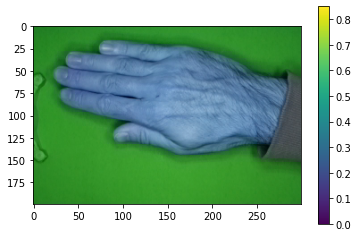

In [ ]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.05,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(200,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 149, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 147, 64)       36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 71, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 35, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 33, 32)       

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    )

datagen.fit(x_train)

In [ ]:
history = model.fit(
      datagen.flow(x_train, y_train, batch_size=40),
      steps_per_epoch= len(x_train)/35,  # berapa batch yang akan dieksekusi pada setiap epoch
      validation_data= (x_test, y_test), # menampilkan akurasi pengujian data validasi
      epochs=5,
      callbacks=[red_lr, early_stop]
      )

Epoch 1/5
50/50 [==============================] - 384s 8s/step - loss: 0.9483 - accuracy: 0.5196 - val_loss: 1.0056 - val_accuracy: 0.4886
Epoch 2/5
50/50 [==============================] - 370s 7s/step - loss: 0.4510 - accuracy: 0.8328 - val_loss: 0.5739 - val_accuracy: 0.9384
Epoch 3/5
50/50 [==============================] - 378s 8s/step - loss: 0.1693 - accuracy: 0.9444 - val_loss: 0.5140 - val_accuracy: 0.8973
Epoch 4/5
50/50 [==============================] - 371s 7s/step - loss: 0.1257 - accuracy: 0.9612 - val_loss: 0.4399 - val_accuracy: 0.9361
Epoch 5/5
50/50 [==============================] - 374s 7s/step - loss: 0.1003 - accuracy: 0.9708 - val_loss: 0.5204 - val_accuracy: 0.9384

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


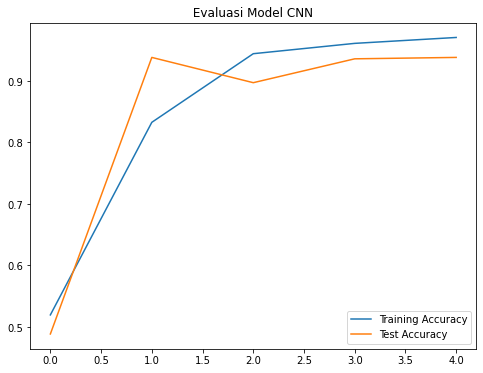

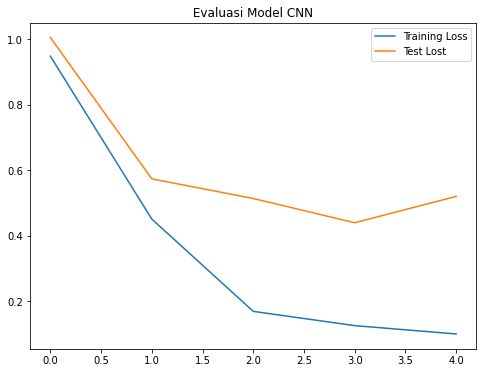

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(" Evaluasi Model CNN ")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Lost')
plt.title(" Evaluasi Model CNN ")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

438/438 [==============================] - 15s 35ms/step
Test accuracy: 0.9383561611175537


In [ ]:
predictions = model.predict(x_test)
predictions

array([[0.16081269, 0.7007778 , 0.13840951],
       [0.59059113, 0.23798251, 0.17142637],
       [0.24774194, 0.26963618, 0.4826219 ],
       ...,
       [0.14261496, 0.7475188 , 0.10986625],
       [0.27952388, 0.5744256 , 0.14605053],
       [0.20729887, 0.22055767, 0.57214344]], dtype=float32)

In [ ]:
predictions[0]

array([0.16081269, 0.7007778 , 0.13840951], dtype=float32)

In [ ]:
np.argmax(predictions[0])

1

In [ ]:
y_test[0]

array([0., 1., 0.], dtype=float32)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  truth = np.argmax(true_label)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == truth:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nama_kelas[predicted_label],
                                               100*np.max(predictions_array),
                                               nama_kelas[truth]),
                                               color=color)

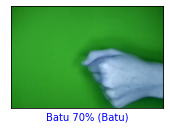

In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.show()

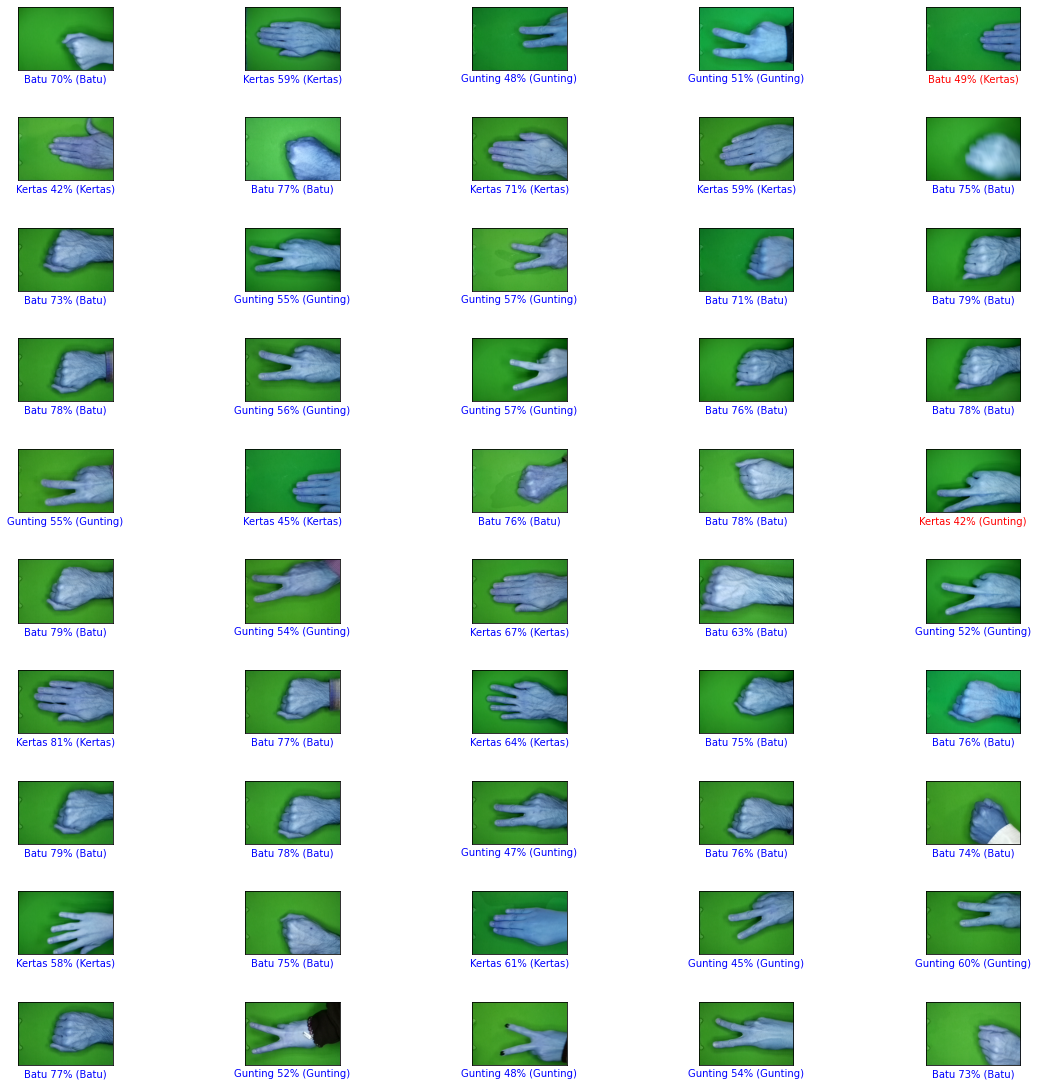

In [ ]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
plt.show()

Saving uji(1).jpeg to uji(1) (2).jpeg
Saving uji(2).jpeg to uji(2) (2).jpeg
Saving uji(3).jpeg to uji(3) (2).jpeg
Saving uji(4).jpg to uji(4).jpg
Saving uji(5).jpeg to uji(5) (2).jpeg
Saving uji(6).jpeg to uji(6) (2).jpeg
Saving uji(7).jpeg to uji(7) (2).jpeg
Saving uji(8).jpg to uji(8).jpg
Saving uji(9).jpeg to uji(9) (2).jpeg
Saving uji(10).jpeg to uji(10) (2).jpeg
Saving uji(11).jpg to uji(11).jpg
Saving uji(12).jpeg to uji(12) (2).jpeg
Saving uji(13).jpeg to uji(13) (2).jpeg
Saving uji(14).jpg to uji(14).jpg
Saving uji(15).jpeg to uji(15) (2).jpeg


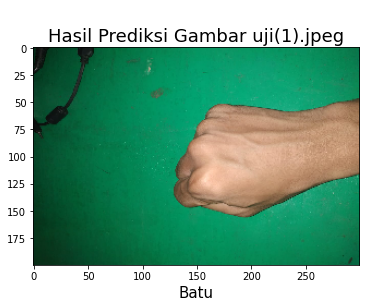

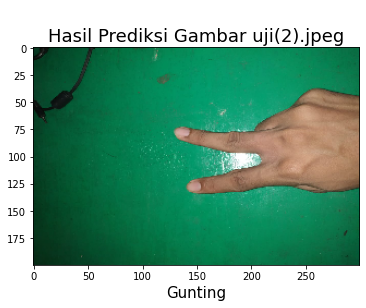

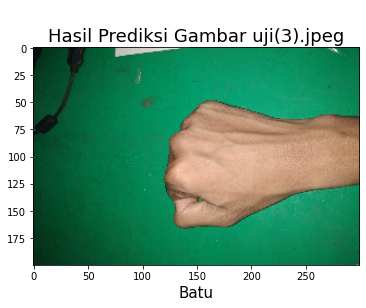

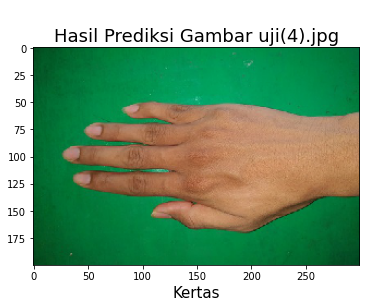

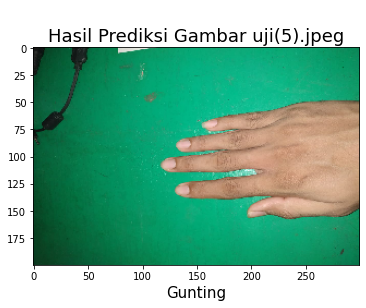

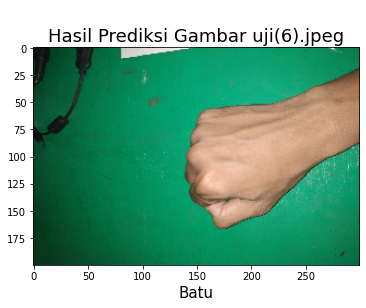

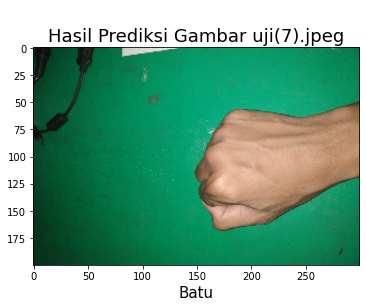

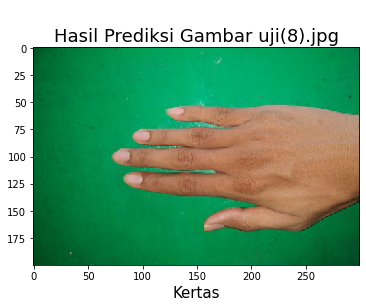

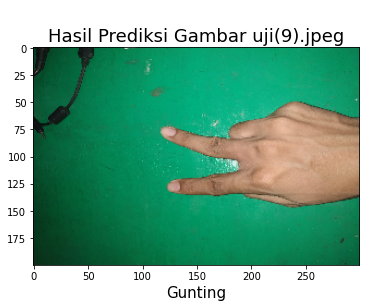

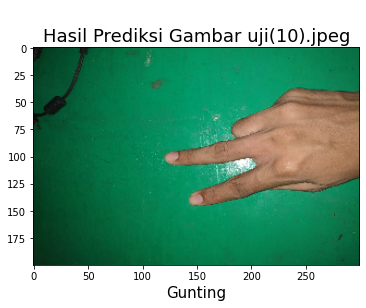

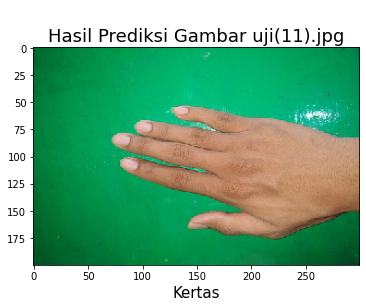

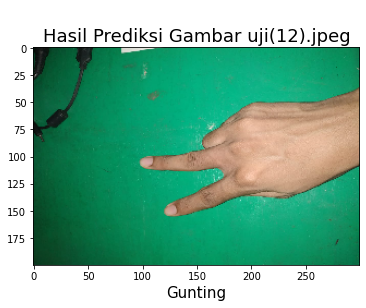

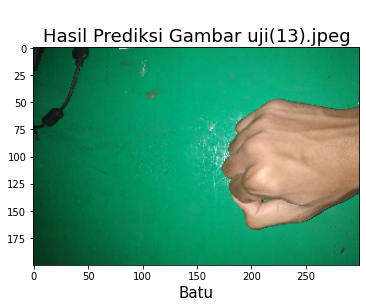

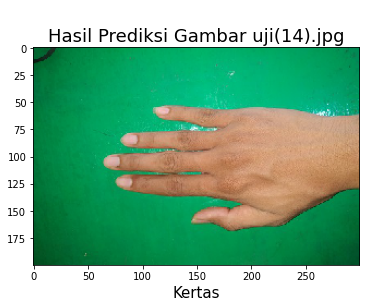

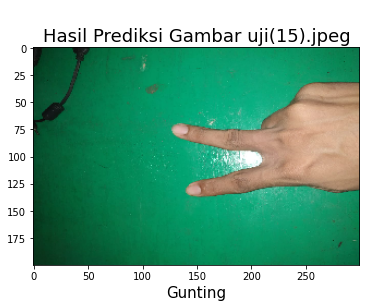

In [ ]:
from google.colab import files
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

uploaded = files.upload()

for path in uploaded.keys():
  img = image.load_img(path, target_size=(200,300))
  gambar = image.img_to_array(img)
  gambar = gambar[np.newaxis,:,:,:]
  """gambar = np.expand_dims(gambar, axis=0)
  gambar = np.vstack([gambar])"""
  prediksi = model.predict(gambar)
  hasil = np.argmax(prediksi)

  imgplot = plt.imshow(img)
  plt.title("\nHasil Prediksi Gambar {}".format(path),fontsize=18)
  plt.xlabel("{}".format(nama_kelas[hasil]), fontsize=15)
  plt.show()